# <span style="color:red"> Numerical Simulation Laboratory</span>
## <span style="color:orange">  Numerical exercises 10: Samuele Voltan's notebook.</span>

In [133]:
# LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [134]:
# DATA FILES
# circle
pos1_c = np.loadtxt("data/lab10/ex10.1/circle_pos.out");
best1_c = np.loadtxt("data/lab10/ex10.1/circle_best.out", dtype = "int");
best1_c = np.append(best1_c, best1_c[0]);
pos2_c = np.loadtxt("data/lab10/ex10.2/circle_pos_0.out");
best2_c = np.loadtxt("data/lab10/ex10.2/circle_best_0.out", dtype = "int");
best2_c = np.append(best2_c, best2_c[0]);

# square
pos1_s = np.loadtxt("data/lab10/ex10.1/square_pos.out");
best1_s = np.loadtxt("data/lab10/ex10.1/square_best.out", dtype = "int");
best1_s = np.append(best1_s, best1_s[0]);
pos2_s = np.loadtxt("data/lab10/ex10.2/square_pos_0.out");
best2_s = np.loadtxt("data/lab10/ex10.2/square_best_0.out", dtype = "int");
best2_s = np.append(best2_s, best2_s[0]);

# mean
mean1_c = np.loadtxt("data/lab10/ex10.1/circle_mean.out");
mean1_s = np.loadtxt("data/lab10/ex10.1/square_mean.out");
mean2_c = np.loadtxt("data/lab10/ex10.2/circle_mean_0.out")
mean2_s = np.loadtxt("data/lab10/ex10.2/square_mean_0.out")

### <span style="color:red">Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a Simulated Annealing (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.

### <span style="color:orange">Solution

Here I display the cost decay and the best path for the TSP on a cirle.

last cost = 7.9700


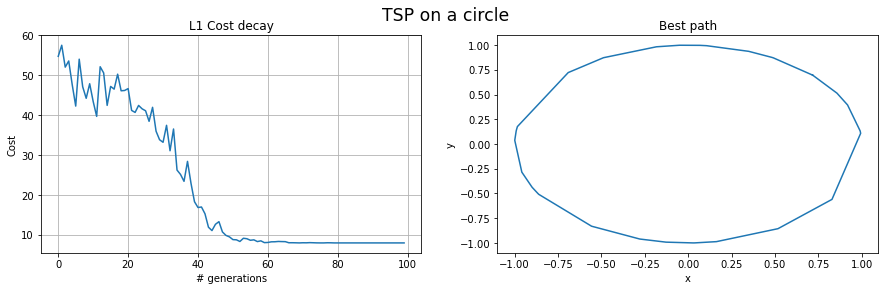

In [138]:
x = np.arange(mean1_c.size);
plt.figure(figsize=(15,4))
plt.suptitle("TSP on a circle", fontsize = "xx-large")
plt.subplot(1, 2, 1)
plt.title("L1 Cost decay")
plt.plot(x, mean1_c);
plt.xlabel(r"# generations")
plt.ylabel(r"Cost")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title("Best path")
plt.plot(pos1_c[best1_c, 0], pos1_c[best1_c, 1]);
plt.xlabel(r"x")
plt.ylabel(r"y")
print(f"last cost = {mean1_c[-1]:.4f}")
plt.plot();

Here I display the cost decay and the best path for the TSP inside a square.

last cost = 5.4777


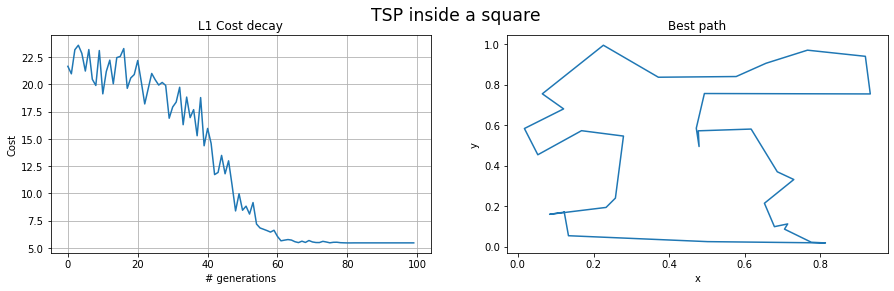

In [137]:
x = np.arange(mean1_s.size);
plt.figure(figsize=(15,4))
plt.suptitle("TSP inside a square", fontsize = "xx-large")
plt.subplot(1, 2, 1)
plt.title("L1 Cost decay")
plt.plot(x, mean1_s);
plt.xlabel(r"# generations")
plt.ylabel(r"Cost")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title("Best path")
plt.plot(pos1_s[best1_s, 0], pos1_s[best1_s, 1]);
plt.xlabel(r"x")
plt.ylabel(r"y")
print(f"last cost = {mean1_s[-1]:.4f}")
plt.plot();

### <span style="color:red">Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with **4 parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, but every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

### <span style="color:orange">Solution

Here I display the cost decay and the best path for the parallelized TSP on a cirle.

AVERAGE cost = 11.0850
BEST PATH cost = 7.8030


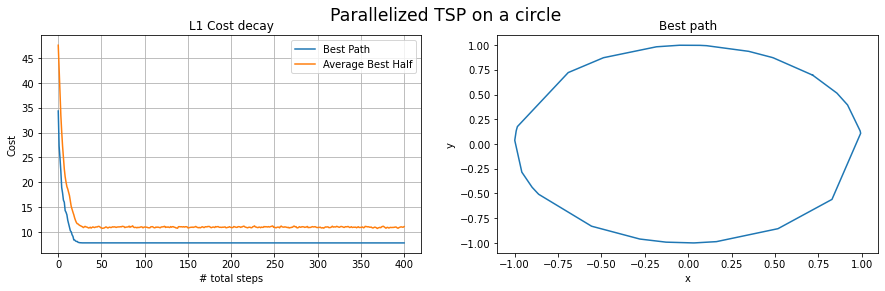

In [131]:
x = np.arange(mean2_c.size // 2);
plt.figure(figsize=(15,4))
plt.suptitle("Parallelized TSP on a circle", fontsize = "xx-large")
plt.subplot(1, 2, 1)
plt.title("L1 Cost decay")
plt.plot(x, mean2_c[:,0], label="Best Path");
plt.plot(x, mean2_c[:,1], label="Average Best Half");
plt.xlabel(r"# total steps")
plt.ylabel(r"Cost")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title("Best path")
plt.plot(pos2_c[best2_c, 0], pos2_c[best2_c, 1]);
plt.xlabel(r"x")
plt.ylabel(r"y")
print(f"AVERAGE cost = {mean2_c[-1, 1]:.4f}")
print(f"BEST PATH cost = {mean2_c[-1, 0]:.4f}")
plt.plot();

AVERAGE cost = 5.4764
BEST PATH cost = 5.4672


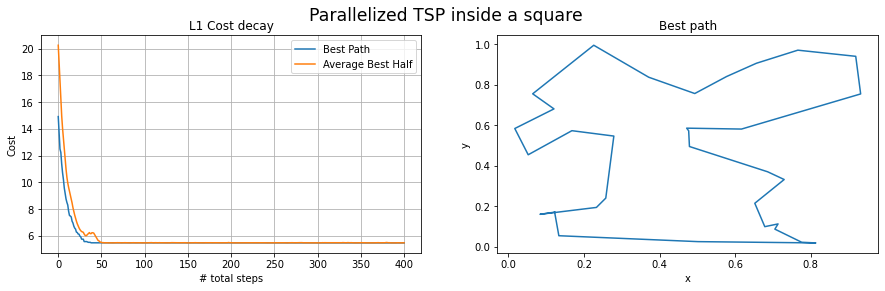

In [132]:
x = np.arange(mean2_s.size // 2);
plt.figure(figsize=(15,4))
plt.suptitle("Parallelized TSP inside a square", fontsize = "xx-large")
plt.subplot(1, 2, 1)
plt.title("L1 Cost decay")
plt.plot(x, mean2_s[:,0], label="Best Path");
plt.plot(x, mean2_s[:,1], label="Average Best Half");
plt.xlabel(r"# total steps")
plt.ylabel(r"Cost")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title("Best path")
plt.plot(pos2_s[best2_s, 0], pos2_s[best2_s, 1]);
plt.xlabel(r"x")
plt.ylabel(r"y")
print(f"AVERAGE cost = {mean2_s[-1, 1]:.4f}")
print(f"BEST PATH cost = {mean2_s[-1, 0]:.4f}")
plt.plot();

Note that the parallelized code has improved our results from Exercise09.1, since the best path cost is 5.4672 versus 5.4737 of the previous Notebook. Despite the tiny difference, the path is slightly changed.